In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

In [169]:
train_data , test_data = load_titanic_data()

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# train_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699113,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526507,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.416700,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


In [ ]:
train_data[train_data["Sex"]=="female"]["Age"].median()

27.0

In [ ]:
train_data['FamilySize'] = (train_data['SibSp'] + train_data['Parch']).astype(int)
test_data['FamilySize'] = (test_data['SibSp'] + test_data['Parch']).astype(int)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


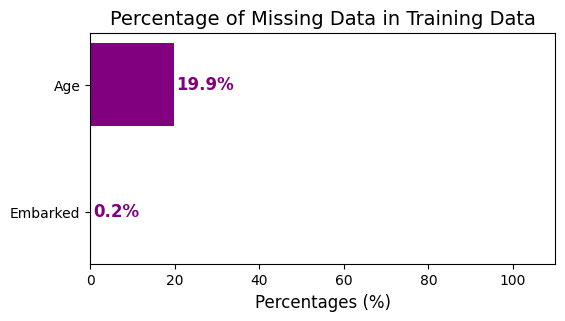

In [ ]:
def missing_percent_plot(df, data_string):
    '''
    This function visualizes the percentage of missing data in each feature of a DataFrame
    '''
    # Calculate the percentage of missing value in each feature
    nan_percent= 100*(df.isnull().sum()/len(df))

    # Filtering features with missing value
    nan_percent= nan_percent[nan_percent>0].sort_values()
    nan_percent = round(nan_percent,1)

    # Plot the barh chart
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.barh(nan_percent.index, nan_percent.values, color='purple', height=0.65)

    # Annotate the values and indexes
    for i, (value, name) in enumerate(zip(nan_percent.values, nan_percent.index)):
        ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='purple', fontsize=12)

    # Set x-axis limit
    ax.set_xlim([0,110])

    # Add title and xlabel
    plt.title("Percentage of Missing Data in " + data_string, fontsize=14)
    plt.xlabel('Percentages (%)', fontsize=12)
    plt.show()

missing_percent_plot(train_data, 'Training Data')

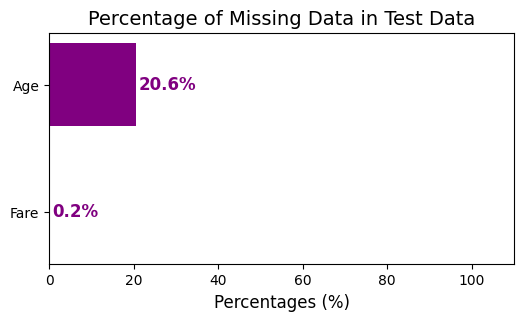

In [ ]:
missing_percent_plot(test_data, 'Test Data')

In [ ]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
pclass_counts = train_data["Pclass"].value_counts()
pclass_counts

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [ ]:
train_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
embarked_counts = train_data["Embarked"].value_counts()
embarked_counts

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

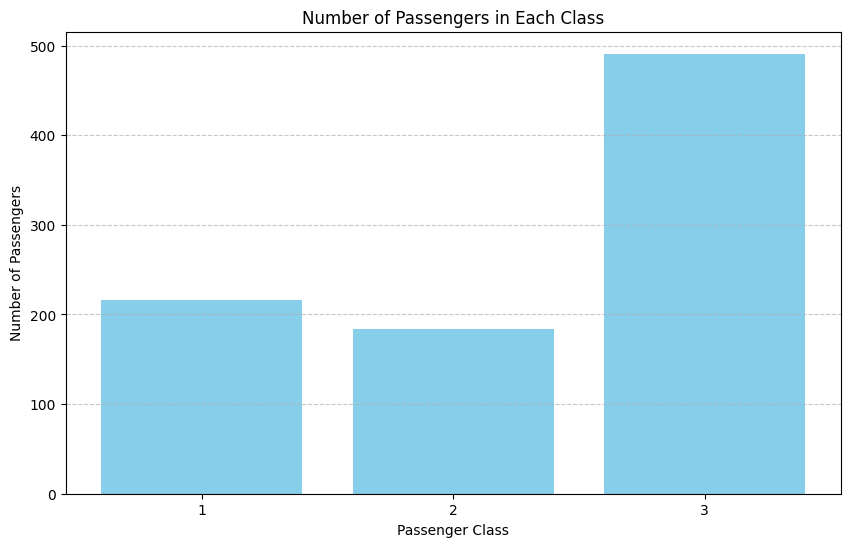

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(pclass_counts.index, pclass_counts.values, color='skyblue')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers in Each Class')
plt.xticks(pclass_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

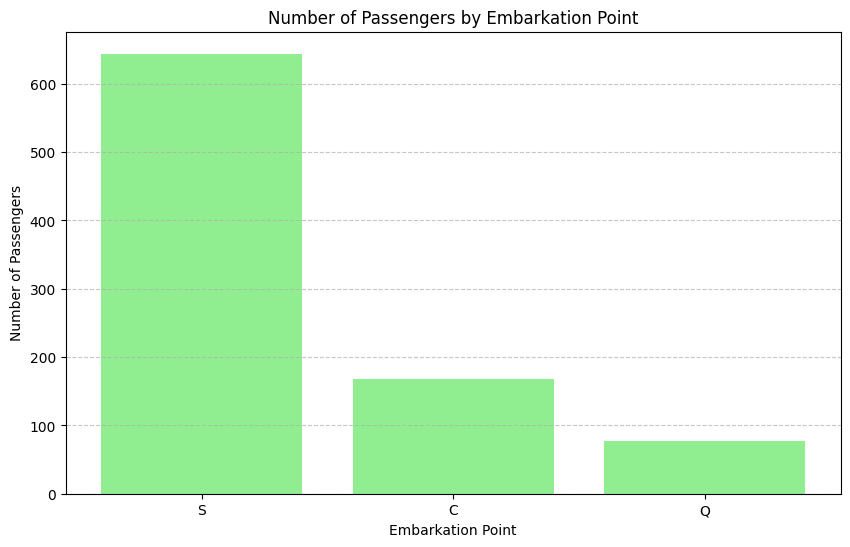

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(embarked_counts.index, embarked_counts.values, color='lightgreen')
plt.xlabel('Embarkation Point')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Embarkation Point')
plt.xticks(embarked_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

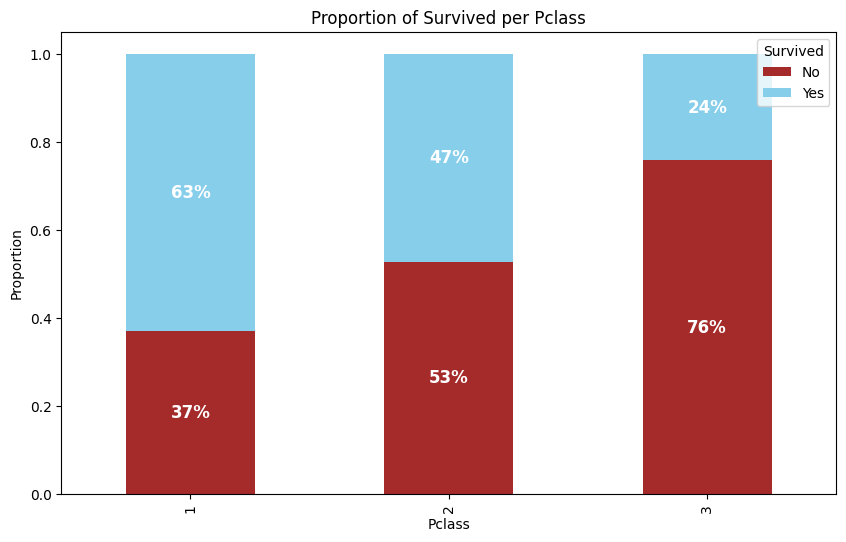

In [ ]:
# Calculate the proportion of survival per Pclass
pclass_survival = train_data.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()

# Plotting the graph
pclass_survival.plot(kind='bar', stacked=True, color=['brown', 'skyblue'], figsize=(10, 6))

# Adding title and labels
plt.title('Proportion of Survived per Pclass')
plt.xlabel('Pclass')
plt.ylabel('Proportion')
plt.legend(['No', 'Yes'], title='Survived')

# Adding percentages on top of the bars
for i in range(pclass_survival.shape[0]):
    for j in range(pclass_survival.shape[1]):
        plt.text(i, pclass_survival.iloc[i, j]/2 + pclass_survival.iloc[:, :j].sum(axis=1).iloc[i],
                 f"{pclass_survival.iloc[i, j]*100:.0f}%", ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.show()

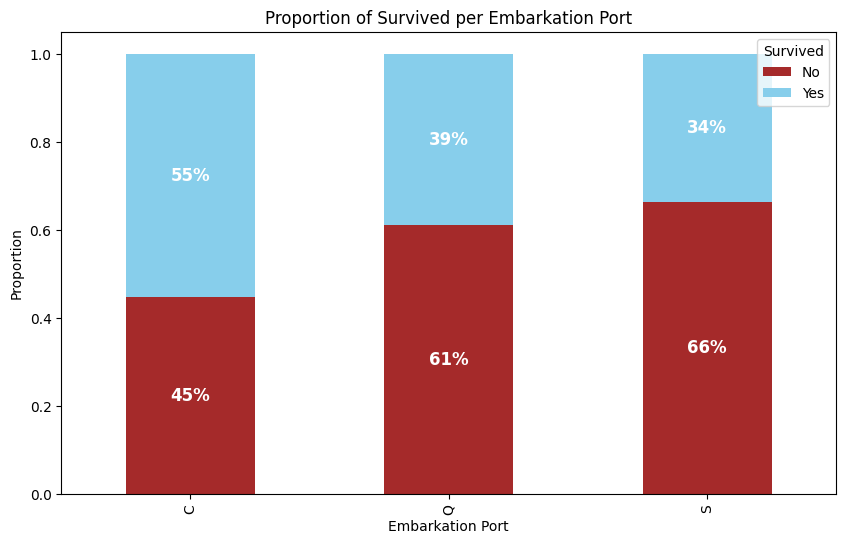

In [ ]:
embarked_survival = train_data.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack()

# Plotting the graph
embarked_survival.plot(kind='bar', stacked=True, color=['brown', 'skyblue'], figsize=(10, 6))

# Adding title and labels
plt.title('Proportion of Survived per Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Proportion')
plt.legend(['No', 'Yes'], title='Survived')

# Adding percentages on top of the bars
for i in range(embarked_survival.shape[0]):
    for j in range(embarked_survival.shape[1]):
        plt.text(i, embarked_survival.iloc[i, j]/2 + embarked_survival.iloc[:, :j].sum(axis=1).iloc[i],
                 f"{embarked_survival.iloc[i, j]*100:.0f}%", ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.show()

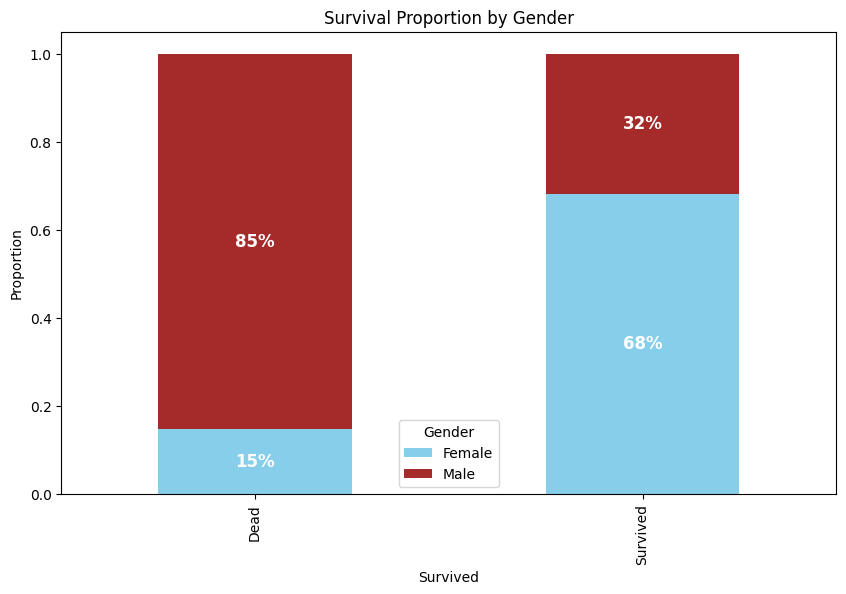

In [ ]:
train_data['Survived'] = train_data['Survived'].map({0: 'Dead', 1: 'Survived'})

# Count the number of survivors and non-survivors by gender
sex_survival = train_data.groupby(['Survived', 'Sex']).size().unstack()

# Normalize the counts to get proportions
sex_survival_proportions = sex_survival.div(sex_survival.sum(axis=1), axis=0)

# Plotting the graph
sex_survival_proportions.plot(kind='bar', stacked=True, color=['skyblue', 'brown'], figsize=(10, 6))

# Adding title and labels
plt.title('Survival Proportion by Gender')
plt.xlabel('Survived')
plt.ylabel('Proportion')
plt.legend(['Female', 'Male'], title='Gender')

# Adding percentages on top of the bars
for i in range(sex_survival_proportions.shape[0]):
    for j in range(sex_survival_proportions.shape[1]):
        percentage = sex_survival_proportions.iloc[i, j] * 100
        plt.text(i, sex_survival_proportions.iloc[:, :j].sum(axis=1).iloc[i] + sex_survival_proportions.iloc[i, j]/2,
                 f"{percentage:.0f}%", ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ("ordinal_encoder", OrdinalEncoder()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])


num_attribs = ["Age", "SibSp", "Parch", "Fare","FamilySize"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])


In [ ]:
train_data = train_data.drop(columns=['Ticket','PassengerId','Name'], axis=1);
# corr=train_data.corr()
# plt.figure(figsize=(12, 12))
# sns.heatmap(corr,annot=True,square=True,cmap='rocket')
# plt.title('Correlation between features');

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score , train_test_split , cross_validate
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
x_train = preprocess_pipeline.fit_transform(train_data)
x_train

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.56573582,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.6638609 ,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.10463705,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833664, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276213, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
y_train = train_data["Survived"]

In [ ]:
# y_test = test_data["PassengerId"]

**Default parameters**

In [ ]:
xgb_clf = XGBClassifier()

In [ ]:
xgb_clf.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:


xgb_scores = cross_val_score(xgb_clf, x_train, y_train, cv=10,scoring='f1')
xgb_scores.mean()

0.7456903208287912

In [ ]:
x_test = preprocess_pipeline.transform(test_data)
y_pred = xgb_clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth': [4, 5, 6],
    'n_estimators': [70, 80, 90, 100, 120, 150],
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.35, 0.5],
    'gamma': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.95],

    # 'colsample_bytree': [0.3, 0.5, 0.7, 0.9, 1.0],
    # 'subsample': [0.3, 0.5, 0.7, 0.9, 1.0],
    # 'reg_alpha': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.95],
    # 'reg_lambda': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.95],
    # 'min_child_weight': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.95],
    # 'max_delta_step': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.95],
    # 'scale_pos_weight': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.95],
    # 'objective': ['binary:logistic'],
    # 'eval_metric': ['logloss'],
    # 'use_label_encoder': [False],
    # 'verbosity': [0],

    'random_state' : [42]
}

estimator = XGBClassifier()

grid_search = GridSearchCV(
    estimator,
    param_grid
)

grid_search.fit(x_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.95],
                         'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.35, 0.5],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [70, 80, 90, 100, 120, 150],
                         'random_state': [42]})

In [170]:
grid_search_params= grid_search.best_params_

In [171]:
grid_xgb = XGBClassifier(
    **grid_search_params
)

In [172]:
xgb_scores2 = cross_val_score(grid_xgb,x_train, y_train, cv=10,scoring='f1')
xgb_scores2.mean()
# predictions = xgb_clf_grid.predict(xtest)

0.750396036819629

**Ray Tune**

In [ ]:
!pip install ray[tune]

In [ ]:
import ray
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler

config = {
    "max_depth": tune.randint(2, 6),
    "n_estimators": tune.randint(1, 150),
    "gamma": tune.uniform(0.0, 1.0),
    "learning_rate": tune.uniform(0.0, 1.0),
    'random_state': 42
}

In [ ]:
def train_ray(config):
  model = XGBClassifier(**config)
  model.fit(x_train, y_train)

  xgb_scores2 = cross_val_score(model,x_train, y_train, cv=10,scoring='accuracy')
  accuracy = xgb_scores2.mean()
  print(f"Accuracy: {accuracy}")
  ray.train.report({"mean_accuracy": accuracy})
  # return {"mean_accuracy": accuracy}

In [ ]:
analysis = tune.run(
    train_ray,
    metric="mean_accuracy",
    mode="max",
    config=config,
    num_samples=300,
)

In [ ]:
ray_params = analysis.best_config
ray_params

In [ ]:
ray_xgb = XGBClassifier(**ray_params)
ray_xgb.fit(x_train, y_train)
xgb_scores3 = cross_val_score(ray_xgb,x_train, y_train, cv=10,scoring='accuracy')
xgb_scores3.mean()


**EDA**
USE : https://mathpix.com/